### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2018 ###

# Traveling Diet Problem: Creating Affordable and Interesting Diets for all Americans #

#### Anne Ulrich (aulrich3@wisc.edu) and Harish Veeramani (hveeramani@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [Assumptions and Data](#General-Assumptions)
    1. [Scenario 1 - Basic Diet Problem](#Scenario-1)
    1. [Scenario 2 - Multiple locations and age groups](#Scenario-2)
    1. [Scenario 3 - Diet problem + Traveling salesman problem](#Scenario-3)
    1. [Scenario 4 - Diet problem + Modified TSP](#Scenario-4)
    1. [Scenario 5 - Three way tradeoff with taste factor](#Scenario-5)
1. [Solution](#3.-Solution)
    1. [Data](#Spreadsheet-Data)
    1. [Scenario 1 solution](#Scenario-1:)
    1. [Scenario 2 solution](#Scenario-2:)
    1. [Scenario 3 solution](#Scenario-3:)
    1. [Scenario 4 solution](#Scenario-4:)
    1. [Scenario 5 solution](#Scenario-5:)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Here in America, commentators have long noted the structural factors creating permanent communities of underprivileged citizens. In recent years, we’ve seen a particular focus on lack of access to critical health care and prevention resources, with legislative actions and nonprofit initiatives ranging from the Affordable Care Act to Michelle Obama’s Let’s Move! campaign to reduce childhood obesity. One emerging area of investigation revolves around communities’ access to a variety high-quality, healthy foods. In our project, we aim to quantify these access issues by considering the optimal diets that can be constructed from the selection available at a variety of local different stores. 

In constructing our project, we realized that access to healthy nutritional foods depends on a variety of issues. How far away is the grocery store from your house? Do you even have a way of getting to the nearest grocery store? How can you construct a varied diet from the food available to you? Is it better to shop at more than one store given the variation in cost between stores? We sought to answer these questions by improving on a well-known study from economic literature: the Stigler diet.

George Stigler was an economist at Columbia University and the University of Chicago who revolutionized his field by quantitatively analyzing the impact of government economic regulations (previous economists’ analysis had focused on qualitative effects and theory). [1] In 1945, Stigler gathered data on a basic list of foods, nutrients, and prices, then played with the numbers to quantify the cheapest possible diet on the market. His work would inspire George Dantzig to develop the Simplex Algorithm just a few years later, one of the most efficient algorithms available today for solving general problems with linear constraint and objective functions. [2]

Stigler’s diet provided a very good baseline for understanding the price associated with a barebones minimalist diet. However, he didn’t take into account that food has to be bought in unit quantities (he considered only how many nutrients were contained in one dollar’s worth of flour, for instance) and he didn’t consider several additional constraints, like travel time and expense, differing food price by store, and his diet's human appeal. In our project, we sought to address all of these issues to provide a more complete picture of modern Americans’ access to good, nutritious food.

We got most of our nutrient data from the USDA’s Food Composition databases, available online ([3]); we also made up test data for some of the most complicated situations. We hypothesized different prices for different stores that varied based on season; we also created some estimate figures for gas prices and the like. In this report, we explain the theory behind the model in the Mathematical Model section and give the code we used in the Solution section. We discuss the key results immediately afterwards and provide some conclusions and directions for future study in the final section. We hope that this project will provide you the reader with a quantitative understanding of the tradeoffs between the best prices available and the time needed to travel to the stores that carry those best prices.

[1] http://www.econlib.org/library/Enc/bios/Stigler.html 
[2] https://research.googleblog.com/2014/09/sudoku-linear-optimization-and-ten-cent.html and https://web.archive.org/web/20160411141356/https://dl.dropboxusercontent.com/u/5317066/1990-dantzig-dietproblem.pdf 
[3] https://ndb.nal.usda.gov/ndb/search/list

## 2. Mathematical model ##

We made several assumptions about our problem and the data. First, we differed from Stigler's diet by assuming that food must be purchased in whole number quantities (that is, it is not possible to purchase 1.266 cans of green beans). This led us to choose a **mixed integer program** to model the solution. We also assigned the logical constraints that stores have essentially unlimited supplies of food and that food prices do not vary with the season.

### General Assumptions

- Food prices are stable throughout the year and are not affected by seasonal variation and availability.
- Stores have unlimited stock of food
- Food must be purchased in whole number quantities (i. e., it is not possible to purchase 1.266 cans of green beans).

### Data used for our models
Most of the data ensuring that the diet was interesting to eat, as well as all of the price data, was contrived for analysis. We based the nutritional data off the USDA's nutrient database (found at https://ndb.nal.usda.gov/ndb/search/list), but some of the parameters were adjusted for model reasons.

#### Age Groups:
- Child
- Teenager
- Adult

#### Stores:
- Woodman's
- Madison Fresh Market
- Trader Joe's

#### Travel distances (in miles): 

**H** = Home  
**WM** = Woodman's  
**MFM** = Madison Fresh Market  
**TJ** = Trader Joe's  

|        |  H  |  WM  |  MFM  |  TJ  |
|-------:|-----:|-----:|-----:|-----:|
|**H**  |   0  | 17  |  11  |  9  |
|**WM**  |  17   |  0  |  15  |  12  |
|**MFM**  |  11  |  15  |  0  |  5  |
|**TJ**  |  9  |  12  |  5  |  0  |

#### Please see CSV files for data on food costs, nutrients amounts, nutrient limits, and food limits


### Scenario 1
We will start off with a model similar to Stigler's Diet problem. There will be only one source of food and only one age group (adult). Also, we are not including factors such as transportation costs and food taste. The only decision variable is choosing how much of each food to buy. In order to construct a healthy solution, the chosen diet must meet certain nutrient requirments.
Furthermore, to promote variety in the diet, we are setting a limit on how much of each food can be bought. The objective is the minimize the total cost of all the foods bought.
<br></br>


$\textbf{Parameter definitions:}$

$F$ = number of foods  

$N$ = number of nutrients  

$f[i,j]$ = amount of nutrient *j* in food *i*  

$n[i]$ = minimum daily requirement for nutrient *i*  

$m[i]$ = maximum daily requirement for nutrient *i*  

$o[i]$ = maximum food limit for food *i*

$p[i]$ = price of food *i*

<br></br>

$\textbf{Variable definitions:}$  

$x[i]$ = number of units of food i purchased. ($x[i] \geq 0 \text{  } \forall i$)  
<br></br>

$\textbf{Constraints:}$  
##### 1. The amount of any given nutrient is greater than or equal to its lower limit and less than or equal to its upper limit.  
$$ \sum_{i=1}^{F} x[i]*f[i,j] \leq m[j] \text{, } \forall j \in N$$
$$ \sum_{i=1}^{F} x[i]*f[i,j] \geq n[j] \text{, } \forall j \in N$$  

##### 2. The amount of food should not exceed its upper limit.  
$$ x[i] \leq o[i] \text{, } \forall i \in F$$  

$\textbf{Objective:}$  
The objective is to minimize the total cost of food purchased.
$$ \text{Min } \sum_{i=1}^{F} x[i]*p[i] \text{, } \forall i \in F$$  

### Scenario 2
There will be multiple sources of food and three age groups, each with different nutrition requirements. To emphasize a healthy diet, there is a new requirement of food coming from different food groups. The objective remains the same to minimize the total cost of the food bought.
<br></br>

$\textbf{*New* Parameter definitions (in addition to Scenario 1)}$

$A$ = number of age groups

$S$ = number of stores

$T$ = number of food categories 

$\textbf{*Updated* Parameter definitions (updated from Scenario 1)}$

$p[i,j]$ = price of food *i* at store *j*  

$n[i,a]$ = minimum daily requirement for nutrient *i* for age group *a*  

$m[i,a]$ = maximum daily requirement for nutrient *i* for age group *a*

<br></br>

$\textbf{Variable definitions: (updated from Scenario 1)}$  

$x[i,j,a]$ = number of units of food *i* purchased from store *j* for age group *a*
<br></br>

$\textbf{Constraints:}$  
##### 1. (updated) The amount of any given nutrient is greater than or equal to its lower limit and less than or equal to its upper limit for each age group 
$$ \sum_{i=1}^{F} x[i,j,a]*f[i,j] \leq m[j,a] \text{, } \forall j \in N \text{, } \forall a \in A$$
$$ \sum_{i=1}^{F} x[i,j,a]*f[i,j] \geq n[j,a] \text{, } \forall j \in N \text{, } \forall a \in A$$  

##### 2.  (new) There is at least 1 food item per food category
$$\sum_{i=U_t}^{V_t} x[i,j,a] \geq 1 \text{, } \forall a \in A, \forall j \in S, \forall i \in F, \forall t \in T, \text{U and V are the start and end indices for each food category}$$  

$\textbf{Objective:}$  
The objective is to minimize the total cost of all food purchased from all stores.
$$ \text{Min } \sum_{i=1}^{F} x[i,j,a]*p[i,j] \text{, } \forall j \in S, \forall a \in A$$  

### Scenario 3 ###

This time, we assume that there is a cost to travel time, and we analyze it as a tradeoff. We incorporate the machinery of the Traveling Salesman Problem to understand how travel time affects optimal diet.

$\textbf{Parameter definitions (in addition to those from Scenario 2)}$

$Sd[i,j]$ = distance from location i to location j (in miles)  

$C$ = cost of gas per mile

$o[i,j]$ = order of stores traveled (binary matrix)

$\lambda$ = tradeoff parameter

$\textbf{Constraints (in addition to Scenario 2):}$  

##### 1.  (new) Must go to each location once (one out edge and one in edge)
$$ \sum_{j=1}^{S+1} o[i,j] = 1 \text{, } \forall i \in S+1$$
$$ \sum_{i=1}^{S+1} o[i,j] = 1 \text{, } \forall j \in S+1$$

##### 2.  (new) No self loops
$$ o[i,i] = 0 \text{, } \forall i \in S+1$$

$\textbf{Objective:}$  
$$ \text{Min } \sum_{a=1}^{A} \sum_{j=1}^{S} \sum_{i=1}^{F} x[i,j,a]*p[i,j] + \lambda * \sum_{k=1}^{S} \sum_{l=1}^{S} o[k,l]*Sd[k,l]*C$$  

### Scenario 4

We assume that there is a cost to travel time, and we analyze it as a tradeoff. Unlike the previous scenario, we do not require every store to be visited. 

$\textbf{Constraints (changed from Scenario 3):}$  

##### 1.  (updated) Can at most only go to each location once (one out edge and one in edge)
$$ \sum_{j=1}^{S+1} o[i,j] <= 1 \text{, } \forall i \in S+1$$
$$ \sum_{i=1}^{S+1} o[i,j] <= 1 \text{, } \forall j \in S+1$$

$\textbf{Objective:}$  
$$ \text{Min } \sum_{a=1}^{A} \sum_{i=1}^{S} \sum_{j=1}^{F} x[i,j,a]*p[i,j] + \lambda * \sum_{k=1}^{S} \sum_{l=1}^{S} o[k,l]*Sd[k,l]*C$$  

### Scenario 5

We are adding an overall taste factor to the objective, which will now be a 3-way tradeoff.

$\textbf{Variables (in addition to Scenario 4):}$  

$d[i]$ = deliciousness of food *i*

$\textbf{Objective:}$  
$$ \text{Min } \sum_{a=1}^{A} \sum_{i=1}^{F} \sum_{j=1}^{S} x[i,j,a]*p[i,j] + \lambda * \sum_{k=1}^{S} \sum_{l=1}^{S} o[k,l]*Sd[k,l]*C -\delta * \sum_{i=1}^{F} \sum_{j=1}^{S} x[i,j,a] * d[i], \forall a \in A $$  

## 3. Solution ##

### Spreadsheet Data

In [39]:
raw_food = readcsv("data/food_nutrients.csv")
raw_constraints = readcsv("data/constraints.csv")
raw_distances = readcsv("data/distances.csv")
raw_prices = readcsv("data/food_price.csv")
raw_limits = readcsv("data/food_limits.csv")

(r_f,c_f) = size(raw_food)
(r_c,c_c) = size(raw_constraints)
(r_d,c_d) = size(raw_distances)
(r_p,c_p) = size(raw_prices)
(r_l,c_l) = size(raw_limits)

num_nutrients = 16 #2:n-1
num_foods = 152 #17:m
num_ages = 3
num_stores = 3
num_categories = 5

child_minima = raw_constraints[4,:]
child_minima[2] = 1600
child_maxima = raw_constraints[5,:]
child_maxima[2] = 2100

teen_minima = raw_constraints[7,:]
teen_minima[2] = 2400
teen_maxima = raw_constraints[8,:]
teen_maxima[2] = 2800

adult_minima = raw_constraints[10,:]
adult_minima[2] = 2500
adult_maxima = raw_constraints[11,:]
adult_maxima[2] = 2500

nutrients = raw_food[1,:]
foods = raw_food[3:154,1]
ages = ["Child", "Teen", "Adult"]
stores = ["Woodmans", "Fresh Market", "Trader Joe's"]
categories = ["Fruit", "Grain", "Meat", "Vegetable", "Dairy"];

### Scenario 1:

In [40]:
using JuMP, Cbc, NamedArrays

### Data ###
nutrients = raw_food[1,:]
foods = raw_food[3:154,1]
food_nutrients = raw_food[3:154,2:17]
food_prices = raw_prices[2:153,4]
max_quant =  raw_limits[:,2]
min_req = vcat(adult_minima[2:7],adult_minima[9:15],adult_minima[17:21])
max_req = vcat(adult_maxima[2:7],adult_maxima[9:15],adult_maxima[17:21])

#-------------------------------------------------------------------------------------------------------------------------------#

m = Model(solver=CbcSolver())

### Decision variable ###
@variable(m, food[1:num_foods] >= 0, Int)

### Constraints ###
#Min/Max nutrients
@constraint(m, min_nutrient[j in 1:num_nutrients], sum(food[i] * food_nutrients[i,j] for i in 1:num_foods) >= min_req[j] * 365)
@constraint(m, max_nutrient[j in 1:num_nutrients], sum(food[i] * food_nutrients[i,j] for i in 1:num_foods) <= max_req[j] * 365)

#Max food amount (for variety in diet, and health reasons)
@constraint(m, max_food[i in 1:num_foods], food[i] <=  365*max_quant[i])

### Objective: Minimize the total cost of all the foods bought ###
@objective(m, Min, sum(food[i] * food_prices[i] for i in 1:num_foods))
status = solve(m)

println("Shopping list (100mg per unit of food)")
print_with_color(:blue, "------------------------------\n")

for food_item in 1:num_foods
    if (getvalue(food[food_item]) > 0)
        println(foods[food_item], ": ", getvalue(food[food_item]))
    end
end

print_with_color(:blue, "------------------------------")
print("\nTotal Cost: ")
print_with_color(:red, "\$", getobjectivevalue(m))

Shopping list (100mg per unit of food)
------------------------------
Swiss Cheese: 100.0
1% Milk: 1.0
Vanilla yogurt: 1.0
Olive oil: 365.0
Kiwi: 3.0
Pistachio nuts: 508.0
Ground beef: 169.0
Cinnamon: 129.0
Garlic: 365.0
Paprika: 257.0
Garlic: 1.0
Jalapeno peppers: 240.0
Banana peppers: 0.9999999999999999
------------------------------
Total Cost: $3626.0

### Scenario 2:

**WARNING: This code takes a very long time to run!!**

In [4]:
using JuMP, Cbc, NamedArrays
### Data ###
nutrients = raw_food[1,:]
foods = raw_food[3:154,1]
food_nutrients = raw_food[3:154,2:17]
food_prices = raw_prices[2:153,4:6]
max_quant =  raw_limits[:,2]
ages = ["Child", "Teen", "Adult"]
stores = ["Woodmans", "Fresh Market", "Trader Joe's"]

min_req_child = vcat(child_minima[2:7],child_minima[9:15],child_minima[17:21])
max_req_child = vcat(child_maxima[2:7],child_maxima[9:15],child_maxima[17:21])
min_req_teen = vcat(teen_minima[2:7],teen_minima[9:15],teen_minima[17:21])
max_req_teen = vcat(teen_maxima[2:7],teen_maxima[9:15],teen_maxima[17:21])
min_req_adult = vcat(adult_minima[2:7],adult_minima[9:15],adult_minima[17:21])
max_req_adult = vcat(adult_maxima[2:7],adult_maxima[9:15],adult_maxima[17:21])

min_req = hcat(min_req_child,min_req_teen,min_req_adult)
max_req = hcat(max_req_child,max_req_teen,max_req_adult)
min_req = min_req'
max_req = max_req'

#-------------------------------------------------------------------------------------------------------------------------------#

m = Model(solver=CbcSolver())

### Decision variable ###
@variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)

### Constraints ###

#Min/Max nutrients
@constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores)*food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
@constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores)*food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)

#Max food amount
@constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i]*365)

#At least one food item per category
@constraint(m, dairy[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 5:17) >= 1)
@constraint(m, fruit[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 29:47) >= 1)
@constraint(m, vegetable[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 113:152) >= 1)
@constraint(m, grain[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 48:58) >= 1)
@constraint(m, meat[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 59:72) >= 1)
@constraint(m, MUST_DRINK_BEER[a in 2:num_ages], sum(food[a,s,1] for s in 1:num_stores) >= 1)

### Objective ###

@objective(m, Min, sum(food[a,j,i] * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages))
status = solve(m)

println("Shopping list (100mg per unit of food)")
print_with_color(:blue, "------------------------------\n")
for age in 1:num_ages
    print_with_color(:blue, "\n", ages[age], ":")
    for store in 1:num_stores
        print_with_color(:green, "\n", stores[store], ":")
        println()
        for food_item in 1:num_foods
            if (getvalue(food[age, store, food_item]) > 0)
                println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
            end
        end
    end
    println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores))
    println("_________________________")
end

print_with_color(:red, "\nTotal Cost: \$", getobjectivevalue(m))

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Swiss Cheese: 1.0
Raisins: 1.0

Fresh Market:
Basil: 93.0
Coriander: 1.9999999999999998
Garlic: 1.0

Trader Joe's:
Cheerios: 120.0
White rice: 78.0
Almonds: 4.0
Pistachio nuts: 1019.0

Cost for Child: $456.75
_________________________

Teen:
Woodmans:
Beer: 1.0
Parmesan Cheese: 1.0
Raisins: 1.0

Fresh Market:
Basil: 33.00000000000001
Coriander: 28.999999999999996
Thyme: 81.99999999999999
Kale: 1.0

Trader Joe's:
Cheerios: 8.0
Almonds: 304.0
Pistachio nuts: 1174.0
Walnuts: 1.0

Cost for Teen: $526.75
_________________________

Adult:
Woodmans:
Beer: 1.0
Parmesan Cheese: 1.0
Raisins: 1.0

Fresh Market:
Basil: 4.0
Coriander: 43.0
Thyme: 28.0
Garlic: 1.0

Trader Joe's:
Cheerios: 44.0
Fruit and cream oatmeal: 4.0
Almonds: 421.00000000000006
Pistachio nuts: 1124.0

Cost for Adult: $494.25
_________________________

Total Cost: $1477.75

### Scenario 3:

In [41]:
#Here is the second sample data set.
num_nutrients = 3
num_foods = 5
num_ages = 2
num_stores = 3
num_categories = 2

nutrients = ["Vitamin A", "Calcium", "Protein"]
foods = ["Cake", "Pizza", "Milk", "Soup", "Apple", "Pork"]
ages = ["Child", "Adult"]
stores = ["Woodmans", "Fresh Market", "Trader Joe's"]
categories = ["Dairy", "Fruit"]

min_req = [10 15  5    #(rows are age group, columns are requirement for each food)
           20 30 10]
max_req = [ 50 120  75
           100  90 150]
max_quant = [20, 100, 250, 200, 150, 50] 
food_nutrients = [10   0   0     #(rows are foods, columns are nutrients)
                   5  10  20
                   0  10   0
                  10  10  10
                  10   5   0
                   0   20   40]    

deliciousness = [2 4 5 100 10 30]

food_prices = [200 101  2  411 2 100
               10 71 5  20 120 5 
               2  9 207 3011 111 20]   #(rows are stores, columns are foods)

store_distance = [ 0 5 100 500
                   5 0 21 51 
                   100 21 0 32
                   500 51 32 0] #(rows are locations, columns are locations, distance from location i to location j)
C = 10;
############################################################################################

In [42]:
using JuMP, Cbc

gas = 25
C = gas
λ = 1

function solveOpt(λ)
    m = Model(solver=CbcSolver())

    ### Decision variable ###
    @variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
    @variable(m, path[1:num_stores+1,1:num_stores+1], Bin)

    ### Constraints ###

    #Min/Max nutrients
    @constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
    @constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)

    #Max food amount
    @constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i] * 2)
    #At least one food item per category
    
    #One in and out edge
    @constraint(m, out[j in 1:num_stores+1], sum(path[i,j] for i in 1:num_stores+1) == 1)      # one out-edge
    @constraint(m, inn[i in 1:num_stores+1], sum(path[i,j] for j in 1:num_stores+1) == 1)      # one in-edge
    
    #At least one food bought from each store
    @constraint(m, buy[j in 1:num_stores, a in 1:num_ages], sum(food[a, j, 1:num_foods]) >= 1)
    
    #No self loops
    @constraint(m, self[i in 1:num_stores+1], path[i,i] == 0 )

    ### Objective ###
    @objective(m, Min, sum(food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages) + λ*sum(store_distance[k,l] * path[k,l] * gas for k in 1:num_stores, l in 1:num_stores))
    status = solve(m)

    print_with_color(:yellow, "Optimal Path: \n")
    println("Home --> Trader Joe's --> Fresh --> Woodman's --> Home\n")
    println("Shopping list (100mg per unit of food)")
    print_with_color(:blue, "------------------------------\n")

    for age in 1:num_ages
        print_with_color(:blue, "\n", ages[age], ":")
        for store in 1:num_stores
            print_with_color(:green, "\n", stores[store], ":")
            println()
            for food_item in 1:num_foods
                if (getvalue(food[age, store, food_item]) > 0)
                    println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
                end
            end
        end
        println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores))
        println("_________________________")
    end
    
    food_cost = sum(getvalue(food[a,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    println("\nTotal Food Cost: \$", food_cost)
    travel_cost = sum(store_distance[k,l] * getvalue(path[k,l]) * gas for k in 1:num_stores, l in 1:num_stores)
    println("Total Travel Cost: \$", travel_cost)
    print_with_color(:red, "\nTotal Overall Cost: \$", food_cost + travel_cost)
    println()
    J1 = food_cost
    J2 = travel_cost
    return(J1,J2)
end
println(solveOpt(1))

Optimal Path: 
Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 305.0
Apple: 300.0

Fresh Market:
Milk: 1.0

Trader Joe's:
Cake: 19.0
Pizza: 92.0

Cost for Child: $2081.0
_________________________

Adult:
Woodmans:
Milk: 455.0
Apple: 300.0

Fresh Market:
Soup: 290.0

Trader Joe's:
Cake: 40.0
Pizza: 200.0

Cost for Adult: $9190.0
_________________________

Total Food Cost: $11271.0
Total Travel Cost: $250.0

Total Overall Cost: $11521.0
(11271.0, 250.0)


### Scenario 4:

In [43]:
using JuMP, Cbc

### Data ###
gas = 25
C = gas

function solveOpt(λ)
    m = Model(solver=CbcSolver())
    
    ##Decision variable
    @variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
    @variable(m, path[1:num_stores+1,1:num_stores+1], Bin)
    
    ### Constraints ###
    #Min/Max nutrients
    @constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
    @constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)
    
    #Max food amount
    @constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i] * 2)
    
    # NOT One in and out edge --at most one in and out edge with equality
    @constraint(m, out[j in 1:num_stores+1], sum( path[i,j] for i in 1:num_stores+1) <= 1)      # one out-edge
    @constraint(m, inn[i in 1:num_stores+1], sum( path[i,j] for j in 1:num_stores+1) <= 1)      # one in-edge
    
    for k in 1:num_stores
        @constraint(m, sum( path[k,j] for j in 1:num_stores+1) == sum( path[i,k] for i in 1:num_stores+1))      # one in-edge
    end
   
    for b in 1:num_stores
        @constraint(m, sum(food[a,b,c] for a in 1:num_ages,c in 1:num_foods)<=10000000000000*sum( path[i,b] for i in 1:num_stores+1))
    end
    
    #No self loops
    @constraint(m, self[i in 1:num_stores+1], path[i,i] == 0 )

    ### Objective ###
    @objective(m, Min, sum(food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages) + 
        λ*sum(store_distance[k,l] * path[k,l] * gas for k in 1:num_stores, l in 1:num_stores))
    
    status = solve(m)
    print_with_color(:yellow, "Optimal Path: ")
    println("Home --> Trader Joe's --> Fresh (only for adult) --> Woodman's --> Home\n")
    println("Shopping list (100mg per unit of food)")
    print_with_color(:blue, "------------------------------\n")
    for age in 1:num_ages
        print_with_color(:blue, "\n", ages[age], ":")
        for store in 1:num_stores
            print_with_color(:green, "\n", stores[store], ":")
            println()
            for food_item in 1:num_foods
                if (getvalue(food[age, store, food_item]) > 0)
                    println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
                end
            end
        end
        println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores))
        println("_________________________")
    end
    
    food_cost = sum(getvalue(food[a,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    println("\nTotal Food Cost: \$", food_cost)
    travel_cost = sum(store_distance[k,l] * getvalue(path[k,l]) * gas for k in 1:num_stores, l in 1:num_stores)
    println("Total Travel Cost: \$", travel_cost)
    print_with_color(:red, "\nTotal Overall Cost: \$", food_cost + travel_cost)
    println()
    J1 = food_cost
    J2 = travel_cost
    return(J1,J2)
end
solveOpt(1)

Optimal Path: Home --> Trader Joe's --> Fresh (only for adult) --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 306.0
Apple: 299.0

Fresh Market:

Trader Joe's:
Cake: 20.0
Pizza: 92.0

Cost for Child: $2078.0
_________________________

Adult:
Woodmans:
Milk: 454.99999999999994
Apple: 300.0

Fresh Market:
Soup: 289.99999999999994

Trader Joe's:
Cake: 40.0
Pizza: 199.99999999999997

Cost for Adult: $9189.999999999998
_________________________

Total Food Cost: $11268.0
Total Travel Cost: $250.0

Total Overall Cost: $11518.0


(11268.0, 250.0)

### Scenario 5:

In [44]:
using JuMP, Cbc

gas = 25
C = gas

function solveOpt2(λ,δ)
    m = Model(solver=CbcSolver())
    
    ### Decision variables ###
    @variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
    @variable(m, path[1:num_stores+1,1:num_stores+1], Bin)
    
    ### Constraints ###
    #Min/Max nutrients
    @constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
    @constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)
   
    #Max food amount
    @constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i] * 2)
    
    # NOT One in and out edge --at most one in and out edge with equality
    @constraint(m, out[j in 1:num_stores+1], sum( path[i,j] for i in 1:num_stores+1) <= 1)      # one out-edge
    @constraint(m, inn[i in 1:num_stores+1], sum( path[i,j] for j in 1:num_stores+1) <= 1)      # one in-edge
    
    for k in 1:num_stores
        @constraint(m, sum( path[k,j] for j in 1:num_stores+1) == sum( path[i,k] for i in 1:num_stores+1))      # one in-edge
    end
    
    for b in 1:num_stores
        @constraint(m, sum(food[a,b,c] for a in 1:num_ages,c in 1:num_foods)<=10000000000000*sum( path[i,b] for i in 1:num_stores+1))
    end
    
    #No self loops
    @constraint(m, self[i in 1:num_stores+1], path[i,i] == 0 )

    ### Objective ###
    @objective(m, Min, sum(food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages) + 
        λ*sum(store_distance[k,l] * path[k,l] * gas for k in 1:num_stores, l in 1:num_stores) - 
        δ*sum(deliciousness[i]*food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages))
    
    status = solve(m)

    print_with_color(:yellow, "Optimal Path: ")
    println("Home --> Trader Joe's --> Fresh --> Woodman's --> Home\n")
    println("Shopping list (100mg per unit of food)")
    print_with_color(:blue, "------------------------------\n")
    for age in 1:num_ages
        print_with_color(:blue, "\n", ages[age], ":")
        for store in 1:num_stores
            print_with_color(:green, "\n", stores[store], ":")
            println()
            for food_item in 1:num_foods
                if (getvalue(food[age, store, food_item]) > 0)
                    println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
                end
            end
        end
        println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores))
        println("_________________________")
    end
    
    food_cost = sum(getvalue(food[a,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    println("\nTotal Food Cost: \$", food_cost)
    travel_cost = sum(store_distance[k,l] * getvalue(path[k,l]) * gas for k in 1:num_stores, l in 1:num_stores)
    println("Total Travel Cost: \$", travel_cost)
    print_with_color(:red, "\nTotal Overall Cost: \$", food_cost + travel_cost)
    println()
    deliciousness_opt = sum(deliciousness[i]*getvalue( food[a,j,i]) for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    J1 = food_cost
    J2 = travel_cost
    J3 = deliciousness_opt
    return(J1,J2,J3)
end
solveOpt2(1,1)

Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Child: $1.3720999999999998e6
_________________________

Adult:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Adult: $1.3720999999999998e6
_________________________

Total Food Cost: $2.7441999999999995e6
Total Travel Cost: $250.0

Total Overall Cost: $2.7444499999999995e6


(2.7441999999999995e6, 250.0, 92759.99999999999)

## 4. Results and discussion ##

### Scenario 1:
Scenario 1 was the the most basic model. Our results were pretty similiar in concept to the results from Stigler's diet, which makes sense--we implemented a model very similar to his work, except we used a mixed-integer program approach rather than his linear program approach. Coincidentally, the optimal diet had plenty of variety in terms of food categories, even without the relevant constraints. By limiting the amount of each food, we artificially gave variety to the diet.

### Scenario 2:
Likewise, the second model wasn't a huge change when comparing the results to those of the first model--the second model only changed the first model by incorporating additional stores and multiple age groups. A less visible change was actually the time that it took for the scenario to run. The addition of multiple stores and age groups led to the model taking over 2 hours to solve - a drastic jump from the first scenario which ran almost instantly. Just removing one of the category constraints speeds up the program dramatically. At this point we realized just how much the data itself can make on the run time.  

### Scenario 3:
Beginning with the third model, we had to make a couple of pretty significant changes. First, we found that by using the full spreadsheet, our model simply took too long to run. This makes sense numerically (we had a mixed integer program with ~150x20 food variables and ~10 constraints, and the additional travel time components were ~4 constraints with ~9 variables). Therefore, we moved from the previous data (which used mostly real nutrient constraints) to our own contrived data, which is presented above. This allowed us to make changes to our model without having to wait eons before we could see the output. We also removed category constraints, since there were too few foods under consideration to merit the additional constraints. 

Given that the mock data required adults to consume more nutrients, it makes sense that more money is required for their diet. The limitation with less data, however, is that the solution may not make sense in real life. The solution for scenario 3 required every store to be visited, and hence there was no real trade off between food costs and travel costs. Because every store had to be visited, the total distance between all of them was essentially a constant cost added on to the food cost. As a result, a Pareto curve for this scenario was not applicable. 

### Scenario 4:
We came up with the following Pareto curve tradeoffs for scenario 4.

In [45]:
Npts = 10
J1 = zeros(Npts)
J2 = zeros(Npts)

λ = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

for i in 1:10
    (J1[i],J2[i]) = solveOpt(λ[i]);
end
println(J1)
println(J2)

Optimal Path: Home --> Trader Joe's --> Fresh (only for adult) --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 306.0
Apple: 299.0

Fresh Market:

Trader Joe's:
Cake: 20.0
Pizza: 92.0

Cost for Child: $2078.0
_________________________

Adult:
Woodmans:
Milk: 454.99999999999994
Apple: 300.0

Fresh Market:
Soup: 289.99999999999994

Trader Joe's:
Cake: 40.0
Pizza: 199.99999999999997

Cost for Adult: $9189.999999999998
_________________________

Total Food Cost: $11268.0
Total Travel Cost: $250.0

Total Overall Cost: $11518.0
Optimal Path: Home --> Trader Joe's --> Fresh (only for adult) --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 306.0
Apple: 299.0

Fresh Market:

Trader Joe's:
Cake: 20.0
Pizza: 92.0

Cost for Child: $2078.0
_________________________

Adult:
Woodmans:
Milk: 454.99999999999994
Apple: 300.0

Fresh Market:
Soup: 289.99999999999994

Tr

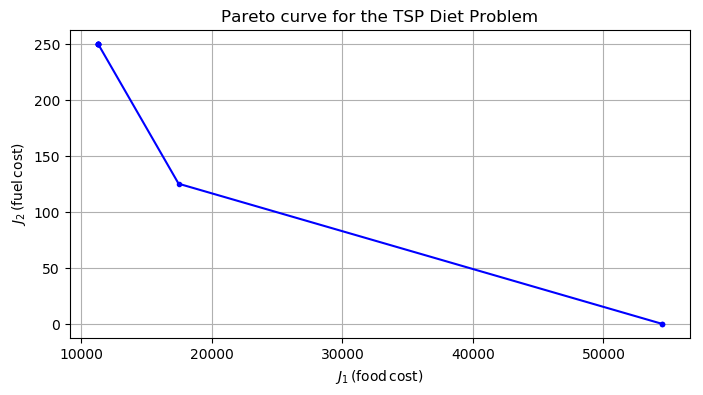

In [47]:
using PyPlot
figure(figsize=(8,4))
plot( J1, J2, "b.-" )
xlabel(L"J_1\, (\sf food\, cost)")
ylabel(L"J_2\, (\sf fuel\, cost)");
title("Pareto curve for the TSP Diet Problem")
grid()

So here we see that in our example, there isn't a particularly curved front for different outcomes: either you have time to travel, and therefore can get the best price, or you don't, in which case you get a more expensive diet. (There is one possible middle ground, where you have some time to travel but not a whole lot, whcih represents a non-trivial decrease in time spend with an increase in spending that doesn't seem too huge.)


### Scenario 5:

For the fifth scenario, we added a tradeoff for how good the food tastes, or its *deliciousness*, and came up with the following 3D graph. To use, please run the code and enter a number at the prompt (like 30, the default). The graph will display at the observation angle described by your input. (We were not able to implement a click-and-drag graph, akin to those displayed on websites such as Wolfram Mathematica; improving 3D graphics in the Julia programming language is an interesting avenue of further exploration.)

In [48]:
Npts = 100
J1 = zeros(Npts)
J2 = zeros(Npts)
J3 = zeros(Npts)

λ = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
δ = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
k = 1
for j in 1:10
    for i in 1:10
        (J1[k],J2[k],J3[k]) = solveOpt2(λ[i],δ[j])
        k+=1
    end
end
println(J1)
println(J2)
println(J3)

Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 306.0
Apple: 300.0

Fresh Market:

Trader Joe's:
Cake: 18.999999999999996
Pizza: 92.0

Cost for Child: $2078.0
_________________________

Adult:
Woodmans:
Milk: 454.99999999999994
Apple: 300.0

Fresh Market:
Soup: 289.99999999999994

Trader Joe's:
Cake: 40.0
Pizza: 199.99999999999997

Cost for Adult: $9189.999999999998
_________________________

Total Food Cost: $11268.0
Total Travel Cost: $250.0

Total Overall Cost: $11518.0
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 306.0
Apple: 300.0

Fresh Market:

Trader Joe's:
Cake: 18.999999999999996
Pizza: 92.0

Cost for Child: $2078.0
_________________________

Adult:
Woodmans:
Milk: 454.99999999999994
Apple: 300.0

Fresh Market:
Soup: 289.99999999999994

Trader J

Cake: 18.999999999999996
Pizza: 92.0

Cost for Child: $2078.0
_________________________

Adult:
Woodmans:
Milk: 454.99999999999994
Apple: 300.0

Fresh Market:
Soup: 289.99999999999994

Trader Joe's:
Cake: 40.0
Pizza: 199.99999999999997

Cost for Adult: $9189.999999999998
_________________________

Total Food Cost: $11268.0
Total Travel Cost: $250.0

Total Overall Cost: $11518.0
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 306.0
Apple: 300.0

Fresh Market:

Trader Joe's:
Cake: 18.999999999999996
Pizza: 92.0

Cost for Child: $2078.0
_________________________

Adult:
Woodmans:
Milk: 454.99999999999994
Apple: 300.0

Fresh Market:
Soup: 289.99999999999994

Trader Joe's:
Cake: 40.0
Pizza: 199.99999999999997

Cost for Adult: $9189.999999999998
_________________________

Total Food Cost: $11268.0
Total Travel Cost: $250.0

Total Overall Cost: $11518.0
Optimal Path: Home --> Tr

Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 272.99999999999994
Apple: 183.0

Fresh Market:
Soup: 183.0

Trader Joe's:

Cost for Child: $4572.0
_________________________

Adult:
Woodmans:
Milk: 499.99999999999994
Apple: 300.0

Fresh Market:
Cake: 7.999999999999999
Pizza: 45.0
Soup: 399.99999999999994

Trader Joe's:

Cost for Adult: $12875.0
_________________________

Total Food Cost: $17447.0
Total Travel Cost: $125.0

Total Overall Cost: $17572.0
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:

Fresh Market:
Cake: 40.0
Milk: 222.99999999999997
Soup: 325.0

Trader Joe's:

Cost for Child: $8015.0
_________________________

Adult:
Woodmans:

Fresh Market:
Cake: 40.0
Pizza: 67.99999999999999
Milk: 499.0
Soup: 399.99999999999994
Apple: 255.99999999999997

Trader Jo

Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Milk: 147.0
Soup: 399.99999999999994
Apple: 0.9999999999999999

Fresh Market:

Trader Joe's:

Cost for Child: $164695.99999999997
_________________________

Adult:
Woodmans:
Pizza: 60.0
Milk: 485.0
Soup: 399.99999999999994
Apple: 300.0

Fresh Market:

Trader Joe's:

Cost for Adult: $172029.99999999997
_________________________

Total Food Cost: $336725.99999999994
Total Travel Cost: $0.0

Total Overall Cost: $336725.99999999994
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Apple: 295.0

Fresh Market:

Trader Joe's:
Soup: 399.99999999999994

Cost for Child: $1.2049899999999998e6
_________________________

Adult:
Woodmans:
Milk: 499.99999999999994
Apple: 300.0

Fresh Market:

Trader Joe's:
Cake: 7.999999999999999
Pizza: 45

Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Child: $1.3720999999999998e6
_________________________

Adult:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Adult: $1.3720999999999998e6
_________________________

Total Food Cost: $2.7441999999999995e6
Total Travel Cost: $250.0

Total Overall Cost: $2.7444499999999995e6
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Child: $1.3720999999999998e

Cost for Adult: $1.3720999999999998e6
_________________________

Total Food Cost: $2.7441999999999995e6
Total Travel Cost: $250.0

Total Overall Cost: $2.7444499999999995e6
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Child: $1.3720999999999998e6
_________________________

Adult:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Adult: $1.3720999999999998e6
_________________________

Total Food Cost: $2.7441999999999995e6
Total Travel Cost: $250.0

Total Overall Cost: $2.7444499999999995e6
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Wood

Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Child: $1.3720999999999998e6
_________________________

Adult:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Adult: $1.3720999999999998e6
_________________________

Total Food Cost: $2.7441999999999995e6
Total Travel Cost: $250.0

Total Overall Cost: $2.7444499999999995e6
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Child: $1.3720999999999998e


Cost for Adult: $1.3720999999999998e6
_________________________

Total Food Cost: $2.7441999999999995e6
Total Travel Cost: $250.0

Total Overall Cost: $2.7444499999999995e6
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Child: $1.3720999999999998e6
_________________________

Adult:
Woodmans:
Cake: 40.0
Pizza: 199.99999999999997

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 499.99999999999994
Soup: 399.99999999999994

Cost for Adult: $1.3720999999999998e6
_________________________

Total Food Cost: $2.7441999999999995e6
Total Travel Cost: $250.0

Total Overall Cost: $2.7444499999999995e6
Optimal Path: Home --> Trader Joe's --> Fresh --> Woodman's --> Home

Shopping list (100mg per unit of food)
------------------------------

Child:
Woo

[40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 67191.0, 79102.0, 79102.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 67191.0, 79102.0, 79102.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 40091.0, 67191.0, 79102.0, 79102.0, 86441.0, 86441.0, 86441.0, 86441.0, 86441.0, 86441.0, 86441.0, 86410.0, 86410.0, 86410.0, 88646.0, 88646.0, 88646.0, 88696.0, 88696.0, 88696.0, 88696.0, 88696.0, 88525.0, 88525.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0, 92760.0]


STDIN> 30


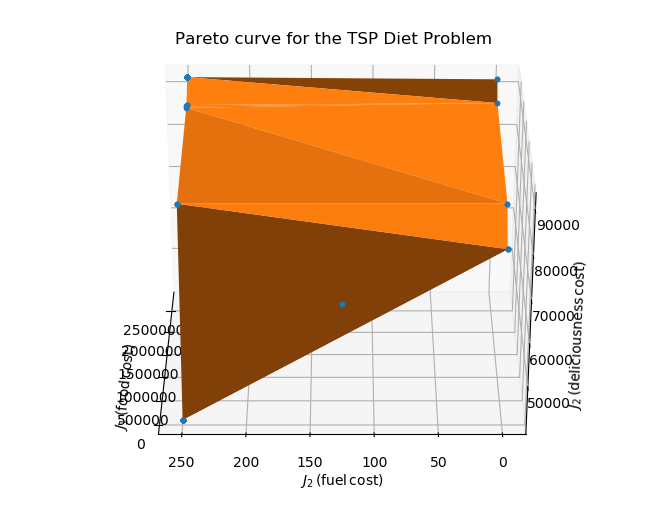

PyObject Text(0.5,0.92,u'Pareto curve for the TSP Diet Problem')

In [49]:
#At the command prompt you can enter your preferred viewing angle.
using PyPlot
fig = figure()
ax = Axes3D(fig)

theAngle = chomp(readline())
theActualAngle = parse(Float64,theAngle)
plot3D(J1,J2,J3, ".")
ax[:view_init](theActualAngle, 180)

surf(J1,J2,J3);
xlabel(L"J_1\, (\sf food\, cost)")
ylabel(L"J_2\, (\sf fuel\, cost)")
zlabel(L"J_2\, (\sf deliciousness\, cost)");
title("Pareto curve for the TSP Diet Problem")

So from the above graph, we can see that there are a lot of options maximizing any one of the three tradeoffs, and depending on your priorities you can just pick some point on the Pareto front that suits you.

Looking over the results as a whole, we see decreasing cost with increasing flexibility, with the exception of part 5, whose massively increased cost is due to the incorporation of deliciousness as a very important constraint.

Some final words about the logical constraints we imposed:

- At first our optimal diets recommended a lot of beer for children and a non-negligible amount of infant formula for adults. Since these foods are clearly not age-appropriate, we added constraints limiting alcohol content and requiring that adults not consume baby food.

- In attempting to impose variety on the diets, we noticed that if the upper limits on fruit are too low, an appropriate diet becomes infeasible. Since many disadvantaged areas in America (and other parts of the world) have limited access to fresh, good-quality food, it's possible (indeed probable) that health disparities are enforced by the existence of the aforementioned food deserts.


## 5. Conclusion ##

In this project, we were able to create diets that a family could rely on to stay healthy and save as much money as possible. It is important to note that because not all of the data is real, these diets do not represent a truly accurate diet a person would eat over a span of a year. More data collection would be needed, and that data must be kept up to date as food changes from season to season and prices fluctuate. With that said, using our data, we were able to create optimal diets minimizing the cost of traveling to the stores all while keeping the overall taste of the diet as high as possible. However, creating a healthy diet is not as simple as that. Our model could be expanded upon in the future to include other factors such as constraints and objective tradeoffs that go into creating a healthy and cost effective diet (e.g., allergies, excercise, food quality, expiration date, etc..)

A future idea involves using the mix of the diet problem and the traveling salesman problem to help people find the best restaurants. For example, imagine you are traveling with your family to a new country for the week, and you want to know where your family should eat. Eating a tasty meal is important, but also minimizing the cost of eating out for a week is just as important. Instead of minimizing the total cost of food bought at a grocery store, the idea here is to minimize the total cost of eating out for a set amount of time, while still eating healthy. The travel cost could be a gas price, but it could also represent costs for services such as Uber, or using the local subway. Rather than collecting grocery prices, we would need to collect menu prices and each food's nutritional info.